In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('../data/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding='ISO-8859-1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [38]:
# Get numeric columns
df_num = df.loc[:, df.dtypes == np.float64]
df_num.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
0,-102.02210,22.20887,229.990,940.0,NaN
1,-102.20075,21.99958,231.990,608.0,NaN
2,-102.28801,22.36685,204.920,532.0,NaN
3,-102.29449,22.18435,327.000,686.0,NaN
4,-110.24480,23.45138,309.885,1841.0,NaN


In [39]:
df_num.shape

(1068, 5)

In [40]:
df_num.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,235.633759,1138.953013,NaN
std,6.703263,3.887670,116.874291,1245.563674,NaN
min,-116.664250,14.561150,26.640000,50.400000,NaN
25%,-105.388865,20.212055,164.000000,501.750000,NaN
50%,-102.174180,22.617190,215.527500,815.000000,NaN
75%,-98.974716,25.510285,292.710000,1322.750000,NaN
max,-86.864120,32.677713,1650.000000,18577.000000,NaN


# Usando kmeans para determinar el numero de agrupamientos

In [41]:
latlong=df_num[["LATITUD","LONGITUD"]]

<AxesSubplot:xlabel='LATITUD', ylabel='LONGITUD'>

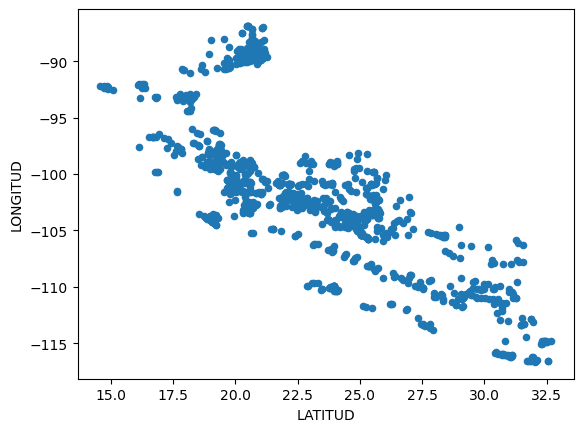

In [42]:
latlong.plot.scatter( "LATITUD","LONGITUD")

In [43]:
from sklearn.cluster import KMeans

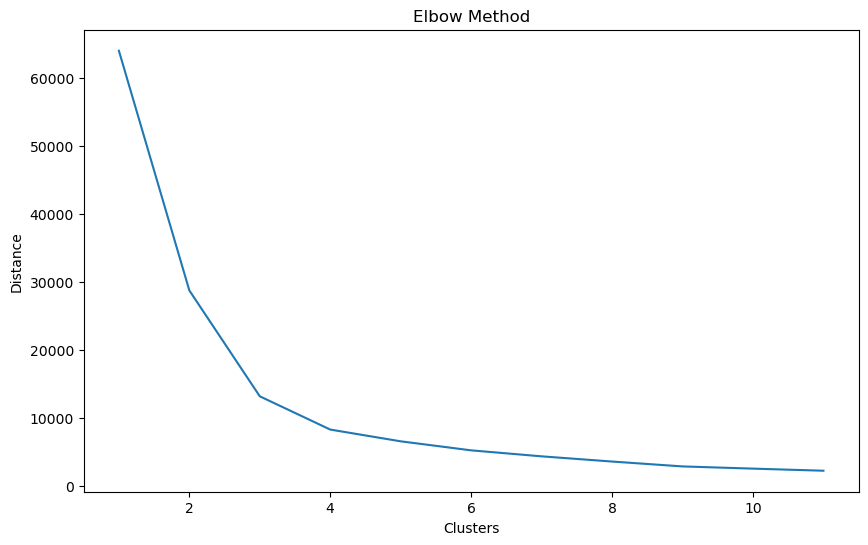

In [44]:
K = range(1,12)
distance=[]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(latlong)
    distance.append(kmeans.inertia_) 

plt.figure(figsize=(10, 6))
plt.plot(K, distance)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()

# NÚMERO OPTIMO ES 3 CLUSTERS

In [45]:
# Obtener la ubicacion optima de los almacenes
kmeans = KMeans(n_clusters=3, random_state=1)
kmean_p = kmeans.fit_predict(latlong) # Nos dice a que cluster pertenece cada ubicacion
countTotal = np.bincount(kmean_p)
print(countTotal) # Total de tiendas que va a surtir cada almacen
print(kmeans.cluster_centers_) # Latitud y longitud de los almacenes

[650 180 238]
[[  22.25422556 -101.7221275 ]
 [  19.47336214  -90.7284703 ]
 [  28.43820216 -110.79448776]]


In [46]:
# Obtener las ciudades de cada almacen
from geopy.geocoders import Nominatim
centers = kmeans.cluster_centers_
geolocator = Nominatim(user_agent="kmeans_app")
locations = []
for i in range(len(centers)):
  location = geolocator.reverse(str(centers[i][0]) + "," + str(centers[i][1]))
  locations.append(location.address)
  print(f'Location {i+1}: {location.address}')

Location 1: Pedregoso, Pinos, Zacatecas, México
Location 2: Ciudad del Sol, Champotón, Campeche, México
Location 3: Guaymas, Sonora, México


In [47]:
sitios = pd.DataFrame()
sitios['LocationName'] = locations
sitios[['Latitude', 'Longitude']] = centers
sitios["Coordinates"] = list(zip(sitios.Longitude, sitios.Latitude))
sitios["Coordinates"] = sitios["Coordinates"].apply(Point)

In [48]:
import geopandas as gpd
from shapely.geometry import Point

In [49]:
df_num["Coordinates"] = list(zip(df_num.LONGITUD, df_num.LATITUD))
df_num["Coordinates"] = df_num["Coordinates"].apply(Point)
df_num.head()

/var/folders/dn/ccn_flld65n7y74k_zx7g5880000gn/T/ipykernel_46708/2517472112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Coordinates"] = list(zip(df_num.LONGITUD, df_num.LATITUD))
/var/folders/dn/ccn_flld65n7y74k_zx7g5880000gn/T/ipykernel_46708/2517472112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Coordinates"] = df_num["Coordinates"].apply(Point)


,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,Coordinates
0,-102.02210,22.20887,229.990,940.0,NaN,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,231.990,608.0,NaN,POINT (-102.20075 21.999579999999998)
2,-102.28801,22.36685,204.920,532.0,NaN,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,327.000,686.0,NaN,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,309.885,1841.0,NaN,POINT (-110.2448 23.45138)


In [50]:
sitios.head()

,LocationName,Latitude,Longitude,Coordinates
0,"Pedregoso, Pinos, Zacatecas, México",22.254226,-101.722127,POINT (-101.72212749692308 22.25422555846154)
1,"Ciudad del Sol, Champotón, Campeche, México",19.473362,-90.728470,POINT (-90.7284703 19.473362144444444)
2,"Guaymas, Sonora, México",28.438202,-110.794488,POINT (-110.7944877605042 28.438202159663867)


In [51]:
gdf = gpd.GeoDataFrame(df_num, geometry="Coordinates")
gdf.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,Coordinates
0,-102.02210,22.20887,229.990,940.0,NaN,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,231.990,608.0,NaN,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,204.920,532.0,NaN,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,327.000,686.0,NaN,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,309.885,1841.0,NaN,POINT (-110.24480 23.45138)


In [52]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [54]:
sitios_gpd = gpd.GeoDataFrame(sitios, geometry="Coordinates")
sitios_gpd.head()

,LocationName,Latitude,Longitude,Coordinates
0,"Pedregoso, Pinos, Zacatecas, México",22.254226,-101.722127,POINT (-101.72213 22.25423)
1,"Ciudad del Sol, Champotón, Campeche, México",19.473362,-90.728470,POINT (-90.72847 19.47336)
2,"Guaymas, Sonora, México",28.438202,-110.794488,POINT (-110.79449 28.43820)


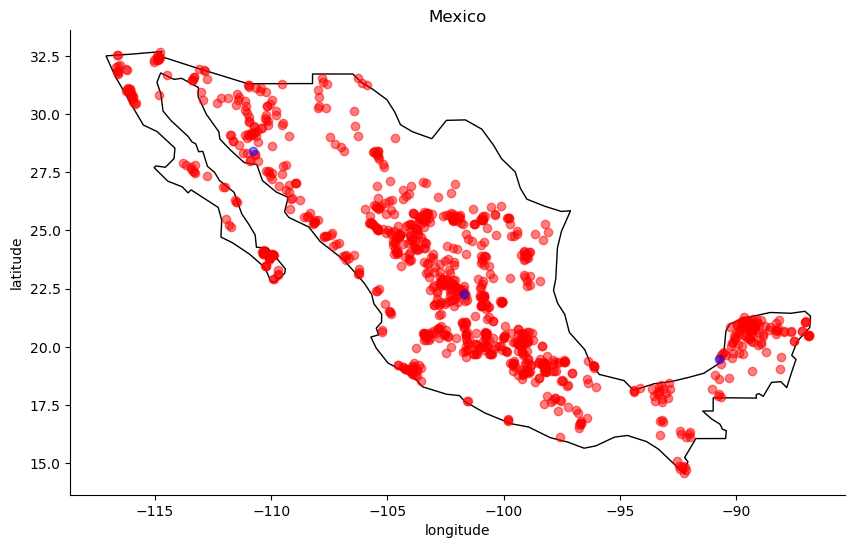

In [55]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)
sitios_gpd.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()